# Import Data

In [13]:
import pandas as pd

df =pd.read_csv('data.csv')
df.dropna(inplace=True)
df['summary'].isna().sum()
df

,id,source,title,image,url,content,date,embedding,created_at,updated_at,summary
0,83,tempo,"Depo Plumpang Terbakar, Anggota DPR Minta Pert...",https://statik.tempo.co/data/2023/03/04/id_118...,https://nasional.tempo.co/read/1698528/depo-pl...,"TEMPO.CO, Jakarta - Anggota Komisi VII DPR RI ...",2023-03-04 06:18:13+00,"[-0.01590039,-0.034130897,0.005732614,-0.01853...",2023-03-04 07:03:39.039332,2023-03-04 07:03:39.039332,Anggota Komisi VII DPR RI Rofik Hananto menyay...
1,84,tempo,Jokowi Perintahkan Wapres Ma'ruf Amin Tinjau L...,https://statik.tempo.co/data/2023/03/04/id_118...,https://nasional.tempo.co/read/1698522/jokowi-...,"TEMPO.CO, Jakarta - Presiden Joko Widodo atau ...",2023-03-04 06:04:38+00,"[-0.017608976,-0.021786924,0.01547983,-0.00932...",2023-03-04 07:03:39.039332,2023-03-04 07:03:39.039332,Presiden Joko Widodo telah memerintahkan Wakil...
2,85,tempo,HNW Mendukung Jamaah Umroh First Travel Dapatk...,https://statik.tempo.co/data/2023/03/04/id_118...,https://nasional.tempo.co/read/1698527/hnw-men...,INFO NASIONAL - Wakil Ketua MPR RI Dr. H. M. H...,2023-03-04 06:18:04+00,"[0.00841488,-0.023665192,0.006762431,-0.013723...",2023-03-04 07:03:39.039332,2023-03-04 07:03:39.039332,Wakil Ketua MPR RI Dr. H. M. Hidayat Nur Wahid...
3,86,tempo,Tim Dokkes Polri Telah Terima 14 Kantong Jenaz...,https://statik.tempo.co/data/2023/03/04/id_118...,https://nasional.tempo.co/read/1698540/tim-dok...,"TEMPO.CO, Jakarta - Tim Kedokteran dan Kesehat...",2023-03-04 06:44:10+00,"[-0.012671886,-0.0039057182,0.019575326,-0.016...",2023-03-04 07:03:39.039332,2023-03-04 07:03:39.039332,Tim Kedokteran dan Kesehatan (Dokkes) Polri te...
4,87,tempo,Bamsoet Ajak Komunitas Otomotif Kembangkan Per...,https://statik.tempo.co/data/2023/03/04/id_118...,https://nasional.tempo.co/read/1698536/bamsoet...,INFO NASIONAL - Ketua MPR RI sekaligus Ketua U...,2023-03-04 06:38:57+00,"[-0.015486176,-0.0125719,-0.0122843925,-0.0343...",2023-03-04 07:03:39.039332,2023-03-04 07:03:39.039332,Ketua MPR RI Bambang Soesatyo telah diangkat s...
...,...,...,...,...,...,...,...,...,...,...,...
32730,63563,kumparan,"5 Hewan Aneh yang Hidup di Palung Mariana, Sal...",https://blue.kumparan.com/image/upload/fl_prog...,https://kumparan.com/kumparansains/5-hewan-ane...,menjadi salah satu lubang terdalam dan tergela...,2023-04-11 20:13:25+00,"[0.008977383,-0.018717425,0.004850631,-0.01737...",2023-04-11 20:20:10.989219,2023-04-11 20:20:10.989219,Peneliti berhasil mengungkap sedikit demi sedi...
32731,63564,kumparan,"Biadab! Guru SD di Banyuwangi Cabuli Siswinya,...",https://blue.kumparan.com/image/upload/fl_prog...,https://kumparan.com/kumparannews/biadab-guru-...,Seorang guru SD di Banyuwangi ditangkap oleh p...,2023-04-11 20:05:30+00,"[0.0040081143,-0.0045449445,-0.00012154845,-0....",2023-04-11 20:20:10.989219,2023-04-11 20:20:10.989219,Seorang guru SD di Banyuwangi ditangkap polisi...
32732,63565,kumparan,Aji Santoso: Jakmania Perlakukan Persebaya den...,https://blue.kumparan.com/image/upload/fl_prog...,https://kumparan.com/kumparanbola/aji-santoso-...,"Pelatih , Aji Santoso, salut dengan sambutan s...",2023-04-11 19:37:49+00,"[-0.008314485,-0.012032238,0.0025099716,0.0025...",2023-04-11 20:20:10.989219,2023-04-11 20:20:10.989219,"Pelatih Persebaya, Aji Santoso, menyampaikan s..."
32733,63566,kumparan,Sopir Audi Cium Kaki Ibu & Istri Hamil Usai Si...,https://blue.kumparan.com/image/upload/fl_prog...,https://kumparan.com/kumparannews/sopir-audi-c...,Suasana haru terjadi usai sidang terdakwa Suge...,2023-04-11 19:24:07+00,"[0.01118314,-0.016214557,0.023612533,-0.024195...",2023-04-11 20:20:10.989219,2023-04-11 20:20:10.989219,"Sugeng Guruh Gautama Legiman, terdakwa kasus k..."


# SkipgramModel

In [ ]:
import numpy as np  # Mengimpor library numpy untuk operasi numerik, seperti array dan matrix
import pandas as pd  # Mengimpor library pandas untuk manipulasi data dalam bentuk DataFrame
# from nltk.tokenize import word_tokenize  # Menghapus import untuk word_tokenize dari nltk (tidak digunakan lagi)
from sklearn.metrics.pairwise import cosine_similarity  # Mengimpor fungsi untuk menghitung kesamaan kosinus antar vektor
import re  # Mengimpor modul regular expressions untuk pemrosesan string

class SkipGramModelOptimized:
    def __init__(self, vocab_size, embedding_dim):
        # Inisialisasi model dengan ukuran vocabulari dan dimensi embedding
        self.vocab_size = vocab_size  # Jumlah kata unik dalam vocabulari
        self.embedding_dim = embedding_dim  # Dimensi embedding
        # Inisialisasi bobot W1 dan W2 dengan nilai random kecil
        self.W1 = np.random.randn(vocab_size, embedding_dim) * 0.01
        self.W2 = np.random.randn(embedding_dim, vocab_size) * 0.01

    def forward(self, one_hot_matrix):
        # Melakukan forward pass untuk menghasilkan hidden layer dan output layer
        hidden_layer = np.dot(one_hot_matrix, self.W1)  # Hidden layer (dot product one-hot dengan W1)
        output_layer = np.dot(hidden_layer, self.W2)  # Output layer (dot product hidden layer dengan W2)
        output_layer = self._softmax(output_layer)  # Normalisasi dengan fungsi softmax
        return hidden_layer, output_layer  # Mengembalikan hidden layer dan output layer

    def backward(self, one_hot_matrix, target_matrix, hidden_layer, output_layer, learning_rate=0.01):
        # Melakukan backward pass untuk menghitung dan memperbarui bobot
        error = target_matrix - output_layer  # Error antara target dan output prediksi
        grad_W2 = np.dot(hidden_layer.T, error)  # Gradien untuk W2
        grad_W1 = np.dot(one_hot_matrix.T, np.dot(error, self.W2.T))  # Gradien untuk W1

        # Update bobot dengan menggunakan learning rate
        self.W1 += learning_rate * grad_W1
        self.W2 += learning_rate * grad_W2

    def _softmax(self, x):
        # Fungsi softmax untuk normalisasi nilai output layer menjadi probabilitas
        exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))  # Stabilitas numerik dengan mengurangi nilai maksimum
        return exp_x / (exp_x.sum(axis=-1, keepdims=True) + 1e-10)  # Menghindari pembagian dengan nol

# Train Functions

In [ ]:
# Fungsi untuk melakukan tokenisasi teks tanpa menggunakan nltk
def tokenize_text(texts):
    # Ganti NaN dengan string kosong dan pastikan semua nilai adalah string
    texts = texts.fillna("").astype(str)
    
    # Mendefinisikan fungsi tokenisasi sederhana menggunakan regular expressions
    def simple_tokenizer(text):
        # Mengubah teks menjadi huruf kecil dan menghapus karakter non-alphanumeric
        text = text.lower()
        # Menggunakan regex untuk mencocokkan kata (hanya karakter alphanumeric dan underscores)
        tokens = re.findall(r'\b\w+\b', text)
        return tokens

    # Mengembalikan tokenisasi untuk setiap teks dalam data
    return [simple_tokenizer(text) for text in texts]

# Fungsi untuk membuat pasangan target-konteks berdasarkan token dan ukuran jendela (window size)
def create_training_pairs(tokens, window_size=2):
    training_pairs = []  # List untuk menyimpan pasangan target-konteks
    for sentence in tokens:  # Iterasi untuk setiap kalimat dalam token
        for i, target_word in enumerate(sentence):  # Iterasi untuk setiap kata dalam kalimat
            # Membuat pasangan konteks dengan ukuran jendela yang ditentukan
            start = max(0, i - window_size)  # Mulai jendela
            end = min(len(sentence), i + window_size + 1)  # Akhir jendela
            context = [sentence[j] for j in range(start, end) if j != i]  # Kata-kata dalam konteks
            for context_word in context:
                training_pairs.append((target_word, context_word))  # Menambahkan pasangan target dan konteks
    return training_pairs  # Mengembalikan pasangan pelatihan

def train_model_optimized(df, column_name, window_size=2, embedding_dim=20, epochs=10, batch_size=128):
    # Tokenisasi teks dan membuat pasangan pelatihan
    tokens = tokenize_text(df[column_name])
    training_pairs = create_training_pairs(tokens, window_size)
    
    # Membuat vocabulari dari kata-kata unik
    all_words = [word for sentence in tokens for word in sentence]
    vocab = list(set(all_words))  # Mengambil kata-kata unik
    word2idx = {word: idx for idx, word in enumerate(vocab)}  # Mapping kata ke indeks

    # Inisialisasi model dengan ukuran vocab dan dimensi embedding
    model = SkipGramModelOptimized(len(vocab), embedding_dim)

    for epoch in range(epochs):
        total_loss = 0  # Inisialisasi total loss untuk setiap epoch
        np.random.shuffle(training_pairs)  # Mengacak pasangan pelatihan
        
        for i in range(0, len(training_pairs), batch_size):
            batch = training_pairs[i:i+batch_size]  # Membagi pasangan pelatihan menjadi batch
            one_hot_matrix = np.zeros((len(batch), len(vocab)))  # Matriks one-hot untuk batch target
            target_matrix = np.zeros((len(batch), len(vocab)))  # Matriks target untuk konteks

            for j, (target, context) in enumerate(batch):
                one_hot_matrix[j][word2idx[target]] = 1  # One-hot encoding untuk target
                target_matrix[j][word2idx[context]] = 1  # One-hot encoding untuk konteks

            # Melakukan forward pass
            hidden_layer, output_layer = model.forward(one_hot_matrix)
            # Menghitung loss menggunakan cross-entropy
            loss = -np.sum(target_matrix * np.log(output_layer + 1e-10)) / batch_size
            # Melakukan backward pass untuk update bobot
            model.backward(one_hot_matrix, target_matrix, hidden_layer, output_layer)
            total_loss += loss  # Menambahkan loss untuk batch ke total loss

        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss / (len(training_pairs) // batch_size)}")

    return model, word2idx, vocab  # Mengembalikan model, mapping kata ke indeks, dan vocabulari

# Search Functions

In [48]:

# Fungsi untuk mendapatkan embedding dokumen dengan merata-rata embedding kata-kata dalam dokumen
def get_document_embedding(doc_tokens, word2idx, model):
    embedding = np.zeros(model.embedding_dim)  # Inisialisasi vektor embedding untuk dokumen
    for word in doc_tokens:  # Iterasi untuk setiap kata dalam dokumen
        if word in word2idx:  # Jika kata ada dalam vocab
            word_idx = word2idx[word]  # Mendapatkan indeks kata
            embedding += model.W1[word_idx]  # Menambahkan embedding kata ke embedding dokumen
    return embedding / len(doc_tokens) if len(doc_tokens) > 0 else embedding  # Mengembalikan rata-rata embedding dokumen

# Fungsi pencarian untuk mencari dokumen yang paling mirip dengan kueri
# def search(query, df, word2idx, model, top_n=3):
#     # Tokenisasi kueri
#     query_tokens = tokenize_text(pd.Series([query]))[0]  # Menggunakan fungsi tokenize_text
#     query_embedding = get_document_embedding(query_tokens, word2idx, model)  # Mendapatkan embedding kueri

#     # Mendapatkan embedding dokumen untuk setiap ringkasan dalam DataFrame
#     doc_embeddings = []
#     for text in df['summary']:  # Iterasi untuk setiap ringkasan dalam DataFrame
#         doc_tokens = tokenize_text(pd.Series([text]))[0]  # Tokenisasi ringkasan
#         doc_embedding = get_document_embedding(doc_tokens, word2idx, model)  # Mendapatkan embedding dokumen
#         doc_embeddings.append(doc_embedding)  # Menambahkan embedding dokumen ke daftar

#     # Menghitung kesamaan kosinus antara embedding kueri dan dokumen
#     similarities = cosine_similarity([query_embedding], doc_embeddings)

#     # Mengambil indeks top N dokumen yang paling mirip
#     top_n_idx = np.argsort(similarities[0])[::-1][:top_n]  # Mengurutkan kesamaan dan mengambil top N

#     # Mengembalikan judul dokumen dan skor kesamaan untuk N dokumen teratas
#     return [(df['title'].iloc[i], similarities[0][i]) for i in top_n_idx]

## Search with table

In [49]:
def search(query, df, word2idx, model, top_n=3):
    query_tokens = query.lower().split()  # Tokenisasi query
    query_embedding = get_document_embedding(query_tokens, word2idx, model)

    doc_embeddings = []
    for _, row in df.iterrows():
        doc_tokens = row['content'].lower().split()  # Tokenisasi dokumen
        doc_embedding = get_document_embedding(doc_tokens, word2idx, model)
        doc_embeddings.append(doc_embedding)

    similarities = cosine_similarity([query_embedding], doc_embeddings)
    top_n_idx = np.argsort(similarities[0])[::-1][:top_n]
    
    # Mengembalikan data dalam format tabel
    return [
        {
            "no": i + 1,
            "title": df.iloc[idx]['title'],
            "url": df.iloc[idx]['url'],
            "similarity": similarities[0][idx]
        }
        for i, idx in enumerate(top_n_idx)
    ]


# Similar Word Function

In [ ]:
import matplotlib.pyplot as plt  # Untuk visualisasi plot
from sklearn.decomposition import PCA  # Untuk reduksi dimensi menggunakan PCA
from sklearn.manifold import TSNE  # Untuk reduksi dimensi menggunakan t-SNE

def find_similar_words_and_plot(word, word2idx, model, top_n=10, method='pca'):
    if word not in word2idx:
        # Menampilkan pesan jika kata tidak ditemukan dalam vocabulari
        print(f"The word '{word}' is not in the vocabulary.")
        return

    # Mendapatkan embedding kata target
    target_idx = word2idx[word]  # Indeks kata target
    target_embedding = model.W1[target_idx]  # Embedding kata target

    # Menghitung kesamaan kosinus dengan semua embedding kata lainnya
    similarities = {}
    for other_word, idx in word2idx.items():
        if other_word != word:  # Menghindari membandingkan kata dengan dirinya sendiri
            other_embedding = model.W1[idx]  # Embedding kata lain
            similarity = cosine_similarity(
                [target_embedding], [other_embedding]
            )[0, 0]  # Mengambil nilai scalar
            similarities[other_word] = similarity

    # Mengurutkan kata berdasarkan kesamaan dan mengambil top-N kata
    most_similar = sorted(similarities.items(), key=lambda x: x[1], reverse=True)[:top_n]

    # Menampilkan kata-kata teratas dengan skor kesamaan
    print(f"\nTop {top_n} words most similar to '{word}':")
    for similar_word, similarity in most_similar:
        print(f"- {similar_word}: {similarity:.4f}")

    # Menyertakan kata target dan embeddingnya
    words = [word] + [item[0] for item in most_similar]  # Kata target dan kata terkait
    embeddings = [target_embedding] + [model.W1[word2idx[item[0]]] for item in most_similar]

    # Reduksi dimensi menjadi 2D
    if method == 'pca':
        reducer = PCA(n_components=2)  # Reduksi dimensi dengan PCA
    elif method == 'tsne':
        reducer = TSNE(n_components=2, random_state=42, perplexity=5)  # Reduksi dimensi dengan t-SNE
    else:
        raise ValueError("Invalid method. Choose either 'pca' or 'tsne'.")
    
    reduced_embeddings = reducer.fit_transform(embeddings)  # Mengurangi dimensi embedding

    # Membuat plot untuk kata-kata
    plt.figure(figsize=(10, 7))
    for i, word in enumerate(words):
        plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1])  # Plotkan posisi embedding
        plt.text(
            reduced_embeddings[i, 0] + 0.003,
            reduced_embeddings[i, 1] + 0.003,
            word,
            fontsize=10,
            ha='center',  # Posisi teks horizontal
            va='center',  # Posisi teks vertikal
        )

    # Kustomisasi plot
    plt.title(f"2D Visualization of '{word}' and Similar Words")  # Judul plot
    plt.xlabel("Dimension 1")  # Label sumbu X
    plt.ylabel("Dimension 2")  # Label sumbu Y
    plt.grid(True)  # Tampilkan grid

    plt.tight_layout()  # Menyesuaikan layout untuk plot
    plt.show()  # Tampilkan plot


# Train

In [42]:
if __name__ == "__main__":
    # Train model using the text column and window size of 2
    model, word2idx, vocab = train_model_optimized(df.head(100), column_name='summary', window_size=2, embedding_dim=100, epochs=20)

Epoch 1/20, Loss: 7.557185132288811
Epoch 2/20, Loss: 7.556554318849338
Epoch 3/20, Loss: 7.555101306862588
Epoch 4/20, Loss: 7.550303655074458
Epoch 5/20, Loss: 7.5315488919200995
Epoch 6/20, Loss: 7.460629064512864
Epoch 7/20, Loss: 7.333368334989204
Epoch 8/20, Loss: 7.21215881351974
Epoch 9/20, Loss: 7.094780607700385
Epoch 10/20, Loss: 6.98613260397305
Epoch 11/20, Loss: 6.889314861114973
Epoch 12/20, Loss: 6.802091266031402
Epoch 13/20, Loss: 6.720938887364484
Epoch 14/20, Loss: 6.64488924403415
Epoch 15/20, Loss: 6.572477454874187
Epoch 16/20, Loss: 6.5026539650935415
Epoch 17/20, Loss: 6.435486069196449
Epoch 18/20, Loss: 6.370417703279784
Epoch 19/20, Loss: 6.307264130391438
Epoch 20/20, Loss: 6.245632843957281


# Save Embeddings

In [43]:
import pickle

def save_embeddings(model, word2idx, vocab, filename="embeddings.pkl"):
    with open(filename, "wb") as file:
        pickle.dump({"W1": model.W1, "word2idx": word2idx, "vocab": vocab}, file)
    print(f"Embeddings saved to {filename}")

def load_embeddings(filename="embeddings.pkl"):
    with open(filename, "rb") as file:
        data = pickle.load(file)
    print(f"Embeddings loaded from {filename}")
    return data["W1"], data["word2idx"], data["vocab"]


In [44]:
# Save embeddings after training
save_embeddings(model, word2idx, vocab, filename="embeddings.pkl")

Embeddings saved to embeddings.pkl


# Search Engine

In [51]:
# Load pre-trained embeddings
W1, word2idx, vocab = load_embeddings(filename="embeddings.pkl")

# Search for a query
query = "jokowi"
results = search(query, df, word2idx, model, top_n=5)

# Print top N search results
print(f"Top search results for '{query}':")
for result in results:
    print(f"No: {result['no']}, Title: {result['title']}, URL: {result['url']}, Similarity: {result['similarity']:.4f}")

Embeddings loaded from embeddings.pkl
Top search results for 'jokowi':
No: 1, Title: Hari Ini, Presiden Jokowi Dikabarkan Lantik Kepala BNPT Pengganti Boy Rafli, URL: https://nasional.okezone.com/read/2023/04/03/337/2791955/hari-ini-presiden-jokowi-dikabarkan-lantik-kepala-bnpt-pengganti-boy-rafli, Similarity: 0.8169
No: 2, Title: Jokowi Tebar BLT ke Pedagang dan Cek Harga Pangan di Pasar Johar Baru, URL: https://economy.okezone.com/read/2023/04/05/320/2793397/jokowi-tebar-blt-ke-pedagang-dan-cek-harga-pangan-di-pasar-johar-baru, Similarity: 0.8151
No: 3, Title: Jokowi: Saya Enggak Langsung Lompat Jadi Presiden, Perlu Proses, URL: https://www.cnnindonesia.com/nasional/20230321102330-32-927638/jokowi-saya-enggak-langsung-lompat-jadi-presiden-perlu-proses, Similarity: 0.7966
No: 4, Title: Istana Terima Surat Pengunduran Diri Zainudin Amali, URL: https://www.cnnindonesia.com/nasional/20230309172841-32-923057/istana-terima-surat-pengunduran-diri-zainudin-amali, Similarity: 0.7964
No: 5, Ti

# Similar Word


Top 15 words most similar to 'jokowi':
- joko: 0.9090
- widodo: 0.9008
- bentukan: 0.8593
- ruf: 0.8364
- pelaksana: 0.8045
- soekarno: 0.8020
- permohonan: 0.8019
- mengungkapkan: 0.7935
- sukarno: 0.7916
- mengemukakan: 0.7697
- menghadapi: 0.7672
- amin: 0.7633
- calon: 0.7629
- mengakui: 0.7609
- 1960: 0.7507


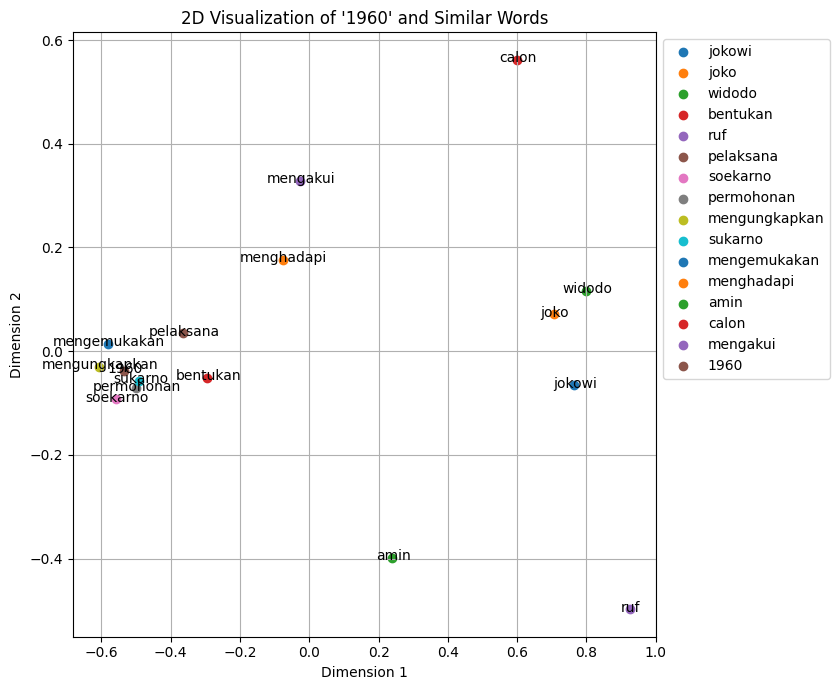

In [46]:
# Contoh penggunaan
word_to_check = "jokowi"
find_similar_words_and_plot(word_to_check, word2idx, model, top_n=15, method='pca')  # Gunakan PCA atau 'tsne'
